# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

In [30]:
data = pd.read_csv("diabetes.csv")


In [31]:
data.shape

(768, 9)

In [32]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [33]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [35]:
data.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Data Cleaning

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [40]:
# Split the data into train and test sets
train_size = int(0.8 * len(X))
train_X, test_X = np.split(X, [train_size])
train_y, test_y = np.split(y, [train_size])

# Node class

In [ ]:
class Node:
   
    def __init__(self, feature=None, threshold=None, value=None, var_red=None, left=None, right=None):
        
         # for decision node
        self.feature = feature      # feature to split on
        self.threshold = threshold  # threshold value to split on
        self.left = left            # left subtree
        self.right = right          # right subtree
        self.var_red = var_red      # variance reduction
        # for leaf node
        self.value = value          # predicted value 

# Tree Class 

In [66]:
class DecisionTreeRegressor:
    
    def __init__(self, min_samples_split=2, max_depth=3):
        
     # initialize the root of the tree 
        self.root = None
        
     # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    # recursive function to build the tree
    def build_tree(self, X,y , curr_depth=0):       
        num_samples, num_features = X.shape
        num_classes=len(np.unique(y))
        
     # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            
     # find the best split
            best_split = self.find_best_split(dataset, num_samples, num_features)
            
            # check if SDR is positive or not
            if best_split["var_red"]>0:
                
            # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                
            # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                
            # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["var_red"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        
        # return leaf node
        return Node(value=leaf_value)
    
    

In [67]:
# To find the best split
def find_best_split(self, dataset, num_samples, num_features):
        
        # To store the best split
        best_split = {}
        max_var_red = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            
        # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                
                # check if childs are not null
                if len(dataset_left) > 0 and len(dataset_right) > 0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    
                # compute SDR
                    curr_var_red = self.variance_reduction(y, left_y, right_y)
                    
                    # update the best split if needed
                    if curr_var_red > max_var_red:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["var_red"] = curr_var_red
                        max_var_red = curr_var_red
                        
        # return best split
        return best_split
    
    # splitting the data 
def split(self, dataset, feature_index, threshold):
    
    dataset_left = np.array([row for row in dataset if row[feature_index] <= threshold])
    dataset_right = np.array([row for row in dataset if row[feature_index] > threshold])
    return dataset_left, dataset_right
    
    

In [68]:
# computing the variance reduction
def variance_reduction(self, parent, l_child, r_child):
    weight_l = len(l_child) / len(parent)
    weight_r = len(r_child) / len(parent)
    reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child))
    return reduction
    
def calculate_leaf_value(self, Y):
    val = np.mean(Y)
    return val
                
def print_tree(self, tree=None, indent=" "):
    if not tree:
        tree = self.root

    if node.value is not None:
        print(tree.value)

    else:
        print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.var_red)
        print("%sleft:" % (indent), end="")
        self.print_tree(tree.left, indent + indent)
        print("%sright:" % (indent), end="")
        self.print_tree(tree.right, indent + indent)
    
# function to train the tree
def fit(self, X, Y):
    self.tree = self.build_tree(X,y)
     
# function to predict new dataset
def make_prediction(self, x, tree):
    if tree.value!=None: return tree.value
    feature_val = x[tree.feature_index]
    if feature_val<=tree.threshold:
        return self.make_prediction(x, tree.left)
    else:
        return self.make_prediction(x, tree.right)
  
 # function to predict a single data point
def predict(self, X):
    preditions = [self.make_prediction(x, self.root) for x in X]
    return preditions

In [69]:
Regressor=DecisionTreeRegressor(min_samples_split=2, max_depth=3)

In [70]:
Regressor.fit(train_X,train_y)

AttributeError: 'DecisionTreeRegressor' object has no attribute 'fit'

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
num_attr=data.select_dtypes(['int64']).columns  
num_attr

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'Age', 'Outcome'],
      dtype='object')

In [76]:
cat_attr = data.select_dtypes('object').columns
cat_attr

Index([], dtype='object')

<BarContainer object of 768 artists>

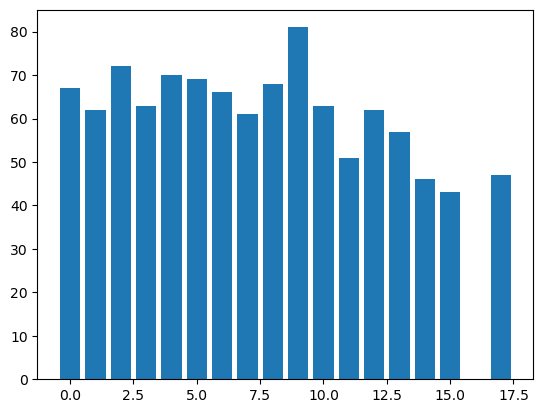

In [78]:
plt.bar(data['Pregnancies'], data['Age'])